In [1]:
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame
from collections import defaultdict
from matplotlib import pyplot as plt

credit_file = open("GermanCredit.csv")
credit_file = pd.read_csv(credit_file)
credit_file

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


[8 pts] Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.)

In [2]:
def drop_n_col_nones(n=3):

    column_to_nones = defaultdict(int)
    i_to_col = {}
    
    for row in credit_file.iterrows():
        ser = row[1]
        for i,col in enumerate(ser.index):
            i_to_col[i] = col
            if ser.values[i]=="none":
                column_to_nones[i]+=1

    column_to_nones[10] = 907
    list_of_dropped_cols = [col for col,nones in sorted(column_to_nones.items(),key=lambda x: (-x[1],x[0]))][:n]
    for col in list_of_dropped_cols:
        credit_file.drop(i_to_col[col],axis=1,inplace=True)
    

drop_n_col_nones()
credit_file

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single','real estate',67,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar','real estate',22,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single','real estate',49,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single','life insurance',45,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single','no known property',53,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar','real estate',31,own,1,'unskilled resident',1,none,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep','life insurance',40,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',car,38,own,1,skilled,1,none,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single','no known property',23,'for free',1,skilled,1,yes,yes,bad


[4 pts] Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes

In [4]:
for col in credit_file.iteritems():
        if credit_file[col[0]].dtype == object:
            credit_file[col[0]] = credit_file[col[0]].str.replace("'","")                   
credit_file

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,real estate,67,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,real estate,22,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,real estate,49,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,life insurance,45,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,no known property,53,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,real estate,31,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,car,38,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,no known property,23,for free,1,skilled,1,yes,yes,bad


[5 pts] The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively

In [5]:
credit_file["checking_status"] = credit_file["checking_status"].str.replace("no checking","No Checking")  
credit_file["checking_status"] = credit_file["checking_status"].str.replace("<0","Low")      
credit_file["checking_status"] = credit_file["checking_status"].str.replace("0<=X<200","Medium")      
credit_file["checking_status"] = credit_file["checking_status"].str.replace(">=200","High")      

credit_file

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,real estate,67,own,2,skilled,1,yes,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,real estate,22,own,1,skilled,1,none,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,real estate,49,own,1,unskilled resident,2,none,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,life insurance,45,for free,1,skilled,2,none,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,no known property,53,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,real estate,31,own,1,unskilled resident,1,none,yes,good
996,Low,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,No Checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,car,38,own,1,skilled,1,none,yes,good
998,Low,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,no known property,23,for free,1,skilled,1,yes,yes,bad


[5 pts] The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High').

In [6]:
credit_file["savings_status"] = credit_file["savings_status"].str.replace("no known savings","No Savings")      
credit_file["savings_status"] = credit_file["savings_status"].str.replace("100<=X<500","Medium")      
credit_file["savings_status"] = credit_file["savings_status"].str.replace("500<=X<1000","High")   
credit_file["savings_status"] = credit_file["savings_status"].str.replace(">=1000","High")   
credit_file["savings_status"] = credit_file["savings_status"].str.replace("<100","Low")  

credit_file

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,real estate,67,own,2,skilled,1,yes,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,real estate,22,own,1,skilled,1,none,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,real estate,49,own,1,unskilled resident,2,none,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,life insurance,45,for free,1,skilled,2,none,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,no known property,53,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,real estate,31,own,1,unskilled resident,1,none,yes,good
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,car,38,own,1,skilled,1,none,yes,good
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,no known property,23,for free,1,skilled,1,yes,yes,bad


[4 pts] Change class column values from 'good' to '1' and 'bad' to '0'.

In [8]:
credit_file["class"] = credit_file["class"].str.replace("good","1")  
credit_file["class"] = credit_file["class"].str.replace("bad","0")    
credit_file

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,real estate,67,own,2,skilled,1,yes,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,real estate,22,own,1,skilled,1,none,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,real estate,49,own,1,unskilled resident,2,none,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,life insurance,45,for free,1,skilled,2,none,yes,1
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,no known property,53,for free,2,skilled,2,none,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,real estate,31,own,1,unskilled resident,1,none,yes,1
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,car,38,own,1,skilled,1,none,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,no known property,23,for free,1,skilled,1,yes,yes,0


[5 pts] Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.

In [9]:
credit_file["employment"] = credit_file["employment"].str.replace("unemployed","Unemployed")  
credit_file["employment"] = credit_file["employment"].str.replace("<1","Amateur")
credit_file["employment"] = credit_file["employment"].str.replace("1<=X<4","Professional")
credit_file["employment"] = credit_file["employment"].str.replace("4<=X<7","Experienced")    
credit_file["employment"] = credit_file["employment"].str.replace(">=7","Expert")   

credit_file

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,real estate,67,own,2,skilled,1,yes,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,real estate,22,own,1,skilled,1,none,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,real estate,49,own,1,unskilled resident,2,none,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,life insurance,45,for free,1,skilled,2,none,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,no known property,53,for free,2,skilled,2,none,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,Experienced,3,female div/dep/mar,real estate,31,own,1,unskilled resident,1,none,yes,1
996,Low,30,existing paid,used car,3857,Low,Professional,4,male div/sep,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,Expert,4,male single,car,38,own,1,skilled,1,none,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,Professional,4,male single,no known property,23,for free,1,skilled,1,yes,yes,0


[3 pts] Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad).

In [10]:
pd.crosstab(credit_file["foreign_worker"],credit_file["class"])

class,0,1
foreign_worker,,
no,4,33
yes,296,667


[2 pts] Similarly, get the count of each category of employment for each category of saving_status.

In [11]:
pd.crosstab(credit_file["savings_status"],credit_file["employment"])

employment,Amateur,Experienced,Expert,Professional,Unemployed
savings_status,,,,,
High,12,18,34,44,3
Low,120,100,133,210,40
Medium,17,24,22,33,7
No Savings,23,32,64,52,12


[4 pts] Find the average credit_amount of single males that have 4<=X<7 years of employment. You can leave the raw result as is, no need for rounding

In [12]:
credit_file["credit_amount"][(credit_file["personal_status"]=="male single") & (credit_file["employment"]=="Professional")].mean()

3650.9085714285716

[4 pts] Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding

In [13]:
credit_file["duration"][credit_file["job"]=="skilled"].mean()

21.41111111111111

In [14]:
credit_file["duration"][credit_file["job"]=="unskilled resident"].mean()

16.535

In [15]:
credit_file["duration"][credit_file["job"]=="high qualif/self emp/mgmt"].mean()

25.16891891891892

In [16]:
credit_file["duration"][credit_file["job"]=="unemp/unskilled non res"].mean()

17.363636363636363

[4 pts] For the purpose 'education', what is the most common checking_status and savings_status?

In [17]:
com_check = credit_file.loc[credit_file['purpose'] == "education"]["checking_status"].mode()
com_save = credit_file.loc[credit_file['purpose'] == "education"]["savings_status"].mode()

print("Most common checking status: "+com_check[0])
print("Most common savings status: "+com_save[0])

Most common checking status: No Checking
Most common savings status: Low


[9 pts] Plot subplots of two histograms: one with savings_status on the x-axis and personal_status as different colors, and another with checking_status on the x-axis and personal_status as different colors.

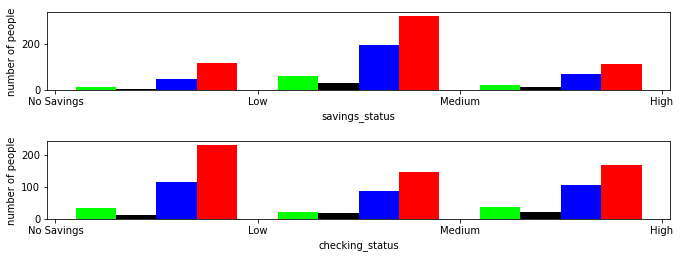

In [18]:
fig, ax = plt.subplots(2,figsize=(10,4))
fig.tight_layout(pad=3.0)



ax[0].set_ylabel('number of people')
ax[0].set_xlabel('savings_status')
ax[1].set_ylabel('number of people')
ax[1].set_xlabel('checking_status')

copy_credit = credit_file.copy()
copy_credit["savings_status"] = copy_credit["savings_status"].map({"No Savings":0, "Low":1,"Medium":2,"High":3})

ax[0].hist([copy_credit["savings_status"][copy_credit["personal_status"]=='male mar/wid'].values,
            copy_credit["savings_status"][copy_credit["personal_status"]=='male div/sep'].values,
            copy_credit["savings_status"][copy_credit["personal_status"]=='female div/dep/mar'].values,
            copy_credit["savings_status"][copy_credit["personal_status"]=='male single'].values
           ],bins=3,color = [[0,1,0],[0,0,0],[0,0,1],[1,0,0]])
plt.sca(ax[0])
plt.xticks(range(4), ["No Savings", "Low", "Medium", "High"])

copy_credit["checking_status"] = copy_credit["checking_status"].map({"No Checking":0, "Low":1,"Medium":2,"High":3})

ax[1].hist([copy_credit["checking_status"][copy_credit["personal_status"]=='male mar/wid'].values,
            copy_credit["checking_status"][copy_credit["personal_status"]=='male div/sep'].values,
            copy_credit["checking_status"][copy_credit["personal_status"]=='female div/dep/mar'].values,
            copy_credit["checking_status"][copy_credit["personal_status"]=='male single'].values
           ],bins=3,color = [[0,1,0],[0,0,0],[0,0,1],[1,0,0]])
plt.sca(ax[1])
plt.xticks(range(4), ["No Savings", "Low", "Medium", "High"])

plt.show()


[9 pts] For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis)

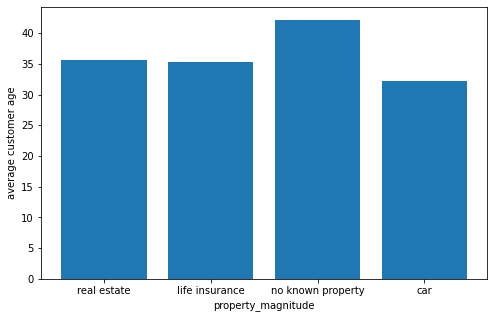

In [19]:
prop_mags = ['real estate', 'life insurance', 'no known property', 'car']
values = [credit_file["age"][(credit_file["credit_amount"]>4000) & (credit_file["property_magnitude"]=='real estate')].mean(),
        credit_file["age"][(credit_file["credit_amount"]>4000) & (credit_file["property_magnitude"]=='life insurance')].mean(),
        credit_file["age"][(credit_file["credit_amount"]>4000) & (credit_file["property_magnitude"]=='no known property')].mean(),
        credit_file["age"][(credit_file["credit_amount"]>4000) & (credit_file["property_magnitude"]=='car')].mean()]

plt.figure(figsize=(8,5))
plt.bar(prop_mags, values)
plt.ylabel("average customer age")
plt.xlabel("property_magnitude")
plt.show()

[6 pts] For people with a "High" savings_status and age above 40, use subplots to plot the following pie charts:
Personal status
Credit history
Job

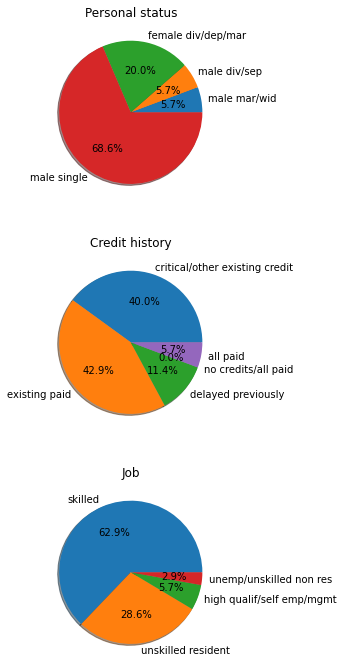

In [20]:
fig, ax = plt.subplots(3,figsize=(10,10))
fig.tight_layout(pad=3.0)

personal_status = [credit_file[(credit_file["personal_status"]=='male mar/wid') & (credit_file["savings_status"]=='High')&(credit_file["age"]>40)].size,
            credit_file[(credit_file["personal_status"]=='male div/sep') & (credit_file["savings_status"]=='High')&(credit_file["age"]>40)].size,
            credit_file[(credit_file["personal_status"]=='female div/dep/mar') & (credit_file["savings_status"]=='High')&(credit_file["age"]>40)].size,
            credit_file[(credit_file["personal_status"]=='male single') & (credit_file["savings_status"]=='High')&(credit_file["age"]>40)].size
           ]
labels = ['male mar/wid','male div/sep','female div/dep/mar','male single']
ax[0].pie(personal_status, labels=labels, autopct='%1.1f%%', shadow=True)
ax[0].set_title('Personal status')


credit_history = [credit_file[(credit_file["credit_history"]=='critical/other existing credit') & (credit_file["savings_status"]=='High')&(credit_file["age"]>40)].size,
            credit_file[(credit_file["credit_history"]=='existing paid') & (credit_file["savings_status"]=='High')&(credit_file["age"]>40)].size,
            credit_file[(credit_file["credit_history"]=='delayed previously') & (credit_file["savings_status"]=='High')&(credit_file["age"]>40)].size,
            credit_file[(credit_file["credit_history"]=='no credits/all paid') & (credit_file["savings_status"]=='High')&(credit_file["age"]>40)].size,
            credit_file[(credit_file["credit_history"]=='all paid') & (credit_file["savings_status"]=='High')&(credit_file["age"]>40)].size
           ]
labels = ['critical/other existing credit', 'existing paid',
       'delayed previously', 'no credits/all paid', 'all paid']
ax[1].pie(credit_history, labels=labels, autopct='%1.1f%%', shadow=True)
ax[1].set_title('Credit history')

job = [credit_file[(credit_file["job"]=='skilled') & (credit_file["savings_status"]=='High')&(credit_file["age"]>40)].size,
            credit_file[(credit_file["job"]=='unskilled resident') & (credit_file["savings_status"]=='High')&(credit_file["age"]>40)].size,
            credit_file[(credit_file["job"]=='high qualif/self emp/mgmt') & (credit_file["savings_status"]=='High')&(credit_file["age"]>40)].size,
            credit_file[(credit_file["job"]=='unemp/unskilled non res') & (credit_file["savings_status"]=='High')&(credit_file["age"]>40)].size]           
labels = ['skilled', 'unskilled resident', 'high qualif/self emp/mgmt',
       'unemp/unskilled non res']
ax[2].pie(job, labels=labels, autopct='%1.1f%%', shadow=True)
ax[2].set_title('Job')

plt.show()